# ENMO integrated over epochs of variable length

**GitHub repository:** https://github.com/TevaSemStudent/HAH913E-ENMO6-Plots

**Sources:**
- https://www.geeksforgeeks.org/python/working-csv-files-python/
- Copilot's Integrated code review

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loading data from the CSV file

filename = "./data/acc_data.csv"  # File name
fields = []  # Column names
rows = []    # Data rows

with open(filename, 'r') as csvfile:
    csvreader = csv.reader(csvfile)  # Reader object

    fields = next(csvreader)  # Read header
    for row in csvreader:     # Read rows
        rows.append(row)

    print("Total no. of rows: %d" % csvreader.line_num)  # Row count

print('Field names are: ' + ', '.join(fields))

print('\nFirst 5 rows are:\n')
for row in rows[:5]:
    for col in row:
        print("%10s" % col, end=" ")
    print('\n')

Total no. of rows: 21002
Field names are: # accelerometer data in g

First 5 rows are:

         t          x          y          z 

      0.00    -0.0938    -0.0156     0.9531 

      0.02    -0.0938    -0.0156     0.9531 

      0.04    -0.0938    -0.0156     0.9531 

      0.06    -0.0938    -0.0156     0.9531 



In [14]:
# ENMO calculation
temp = rows[1:len(rows)]  # Exclude header
acc_data = np.array(temp, dtype=float)  # Convert to float numpy array

time = acc_data[:, 0]  # Time column
acc_data = acc_data[:, 1:4]  # x, y, z columns
def compute_enmo(acc):
    """Compute the Euclidean Norm Minus One (ENMO) for a given acceleration vector."""
    enmo = np.linalg.norm(acc) - 1.0
    return enmo

ENMO = np.array([compute_enmo(acc) for acc in acc_data])  # Compute ENMO for each row


Text(0.5, 0, 'Time (min)')

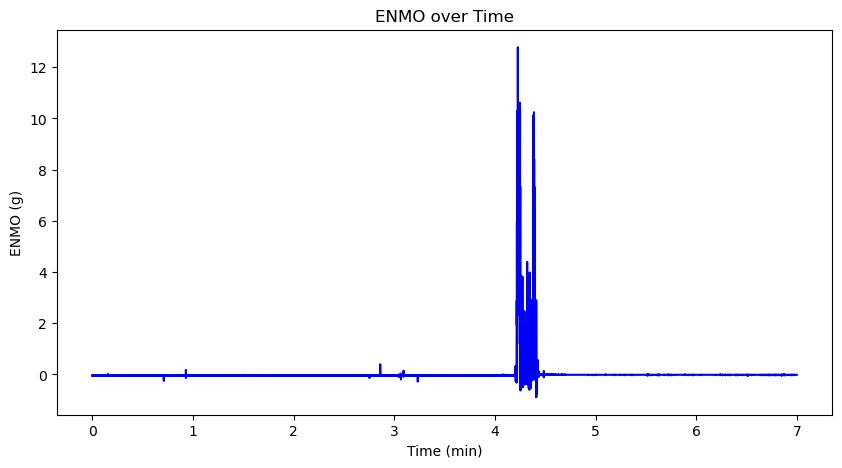

In [17]:
# Plotting ENMO values
plt.figure(figsize=(10, 5)) # Set figure size
plt.plot(time/60, ENMO, label='ENMO', color='blue')
plt.title('ENMO over Time')
plt.ylabel('ENMO (g)')
plt.xlabel('Time (min)')